# 011: k nearest neighbors

In [2]:
import sys

import matplotlib.pyplot as plt
import numpy as np

sys.path.append("../")
from metrics import f_score, auc_roc
from models import KNearestNeighbors

%load_ext autoreload
%autoreload 2

In [3]:
train = np.load("../data/dataset_prep/train.npz")
x_train = train["x_train"]
y_train = train["y_train"]

In [5]:
knn = KNearestNeighbors(metric=f_score)
num_samples = 20000
knn.hyperparameter_tuning(x_train[:num_samples], y_train[:num_samples], verbose=True)
knn.train(x_train[:num_samples], y_train[:num_samples])
predictions = knn.predict(x_train[num_samples:num_samples+10], scores=True)

(1000, 321)
Evaluating variance=0.05
Reduced to 2 features
Predicting sample 0/1000


ValueError: operands could not be broadcast together with shapes (19000,2) (316,) 

In [12]:
knn.k

189

In [17]:
predictions = knn.predict(x_train[num_samples:num_samples+4000], scores=True)
auc_roc(predictions, y_train[num_samples:num_samples+4000])

0.8134081245860869

(array([1488.,  615.,  397.,  218.,  143.,   58.,   54.,   16.,    8.,
           3.]),
 array([0.    , 0.0375, 0.075 , 0.1125, 0.15  , 0.1875, 0.225 , 0.2625,
        0.3   , 0.3375, 0.375 ]),
 <BarContainer object of 10 artists>)

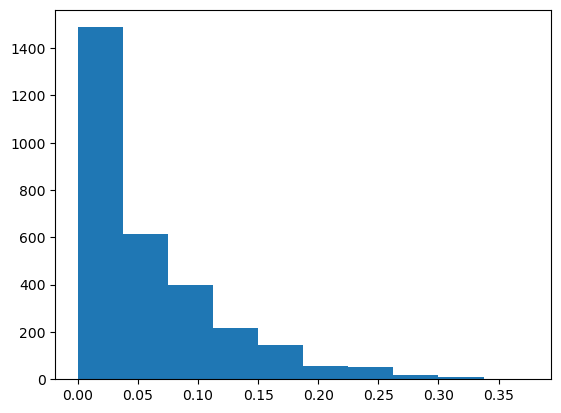

In [54]:
plt.hist(predictions)


# With PCA

In [6]:
knn = KNearestNeighbors(metric=f_score, use_pca=True)
num_samples = 20000
knn.hyperparameter_tuning(x_train[:num_samples], y_train[:num_samples], verbose=True)

knn.train(x_train[:num_samples], y_train[:num_samples])
predictions = knn.predict(x_train[num_samples:num_samples+5000])
print(f"F1 Score: {f_score(predictions, y_train[num_samples:num_samples+5000])}")
print(knn.variance, knn.k, knn.decision_threshold)

(1000, 321)
Evaluating variance=0.05
Reduced to 2 features
Predicting sample 0/1000
Evaluating k=35
Best threshold: 0.145 with score 0.36
Evaluating k=69
Best threshold: 0.16 with score 0.3357142857142857
Evaluating k=137
Best threshold: 0.135 with score 0.35428571428571426
Evaluating k=173
Best threshold: 0.145 with score 0.3448275862068966
Evaluating k=207
Best threshold: 0.14 with score 0.3539823008849558
Evaluating k=275
Best threshold: 0.145 with score 0.3486238532110092
Evaluating k=551
Best threshold: 0.135 with score 0.35820895522388063
Evaluating k=1103
Best threshold: 0.13 with score 0.3610315186246419
Evaluating k=2205
Best threshold: 0.15 with score 0.35125448028673834
Evaluating k=4411
Best threshold: 0.12 with score 0.3597560975609756
Evaluating k=8821
Best threshold: 0.1 with score 0.35327635327635326
Evaluating variance=0.1
Reduced to 4 features
Predicting sample 0/1000
Evaluating k=35
Best threshold: 0.145 with score 0.36721311475409835
Evaluating k=69
Best threshold: 